In [1]:
#basic packages and data
import pandas as pd
import numpy as np

df = pd.read_csv('Iris_Data.csv')

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
len(df)

150

In [3]:
df = df.rename(columns = {'Labels' : 'Species'})

In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# number of unique species 
pd.unique(df['Species'])

array([0, 1, 2], dtype=int64)

In [6]:
# number of irises per species
df.groupby('Species').count()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


50 irises belonging to each of the 3 species

In [7]:
list(df.columns)

['Sepal Length', 'Sepal Width', ' Petal Length', 'Petal Width', 'Species']

<function matplotlib.pyplot.show(close=None, block=None)>

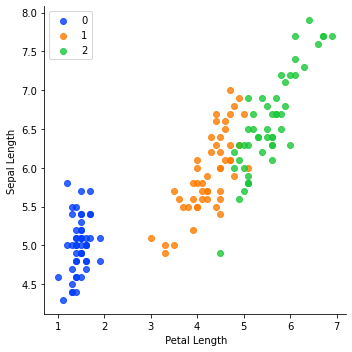

In [8]:
#scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = " Petal Length", y = "Sepal Length", data = df, fit_reg = False, hue = 'Species', legend = False, palette = "bright")
plt.legend(loc = 'upper left')

plt.savefig('iris_scatterplot.png')
plt.show

From the scatterplot species 0 is the most distinct based on sepal and petal lengths with species 1 and 2 being somewhat intermixed. The graph has a general positive correlation between the two variables and relatively few outliers, which should increase the accuracy of the regression model. The correlation matrix below shows the highest correlation between these two variables, with petal width and species also having good correlation.

In [9]:
#correlation matrix
cm = df.corr()
cm["Sepal Length"]

Sepal Length     1.000000
Sepal Width     -0.109369
 Petal Length    0.871754
Petal Width      0.817954
Species          0.782561
Name: Sepal Length, dtype: float64

In [10]:
#packages and variables for regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df.drop(['Sepal Length', 'Species'], axis = 1)
y = df['Sepal Length']

In [11]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [12]:
#linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

ypred = lr.predict(X_test)

In [13]:
lr.score(X_test, y_test)

0.8265809322914018

In [14]:
#root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, ypred)
rmse = sqrt(mse)
rmse

0.36567425733090614

The prediction with all variables except species had a r-squared value of 82% and a root mean square error of 0.36. This shows a good model and good correlation between petal and sepal length, with most of the error coming from the sepal width, which had almost no correlation.

In [15]:
#same regression but with species as a predictor    
X = df.drop(['Sepal Length'], axis = 1)
y = df['Sepal Length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

newlr = LinearRegression()
newlr.fit(X_train, y_train)

ypred = newlr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
rmse = sqrt(mse)
rmse

0.3609256379524534

In [16]:
newlr.score(X_test, y_test)

0.8310557027519643

The r-squared and root mean squared error are very slightly better with species as a predictor, which would be expected due the correlation matrix being 0.78 but is also likely within the general error of the regression. Using this variable had very little impact on the outcome of the model.